<a href="https://colab.research.google.com/github/shunichi922/TEST/blob/TEST/4_4_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.4 scikit-learn

## 4.4.1 前処理

### ●欠損値への対応

In [2]:
import numpy as np
import pandas as pd
# サンプルのデータセットを作成
df = pd.DataFrame(
    {
        "A": [1, np.nan, 3, 4, 5],
        "B": [6, 7, 8, np.nan, 10],
        "C": [11, 12, 13, 14, 15]
    }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [3]:
# 各要素が欠損値かどうか確かめる
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


#### ■写経中に遭遇したscikit-learnのワーニングに対応してみた
https://qiita.com/y_nishimura/items/6d022a25beb21a186d60

In [4]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

# 平均値で欠損値を補完するインスタンスを作成する
#imp = Imputer(strategy="mean", axis=0)
imp = SimpleImputer(strategy="mean")

# 欠損値を補完
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

### ●カテゴリ変数のエンコーディング

In [5]:
import pandas as pd
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": ["a", "b", "a", "b", "c"]
    }
)
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [6]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンスを生成
le = LabelEncoder()
# ラベルのエンコーディング
le.fit(df["B"])
le.transform(df["B"])

array([0, 1, 0, 1, 2])

In [7]:
# 元の値を確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

#### ■写経中に遭遇したscikit-learnのワーニングに対応してみた
https://qiita.com/y_nishimura/items/6d022a25beb21a186d60

In [8]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer

# DataFrameをコピー
df_ohe = df.copy()

# ラベルエンコーダのインスタンス化
#le = LabelEncoder()

# 英語のa、b、cを1、2、3に変換
#df_ohe["B"] = le.fit_transform(df_ohe["B"])

# One-hotエンコーダのインスタンス化
#ohe = OneHotEncoder(categorical_features=[1])

# ColumnTransformerのインスタンス化
ct = ColumnTransformer([('B_x', CountVectorizer(analyzer=lambda x: [x]), 'B')],
    remainder = 'passthrough')

# One-hotエンコーディング
#ohe.fit_transform(df_ohe).toarray()
ct.fit_transform(df_ohe)

array([[1, 0, 0, 1],
       [0, 1, 0, 2],
       [1, 0, 0, 3],
       [0, 1, 0, 4],
       [0, 0, 1, 5]])

### ●特徴量の正規化

#### 分散正規化

In [10]:
import pandas as pd
# DataFrameを作成する
df = pd.DataFrame(
    {
        "A": [1, 2, 3, 4, 5],
        "B": [100, 200, 400, 500, 800]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [11]:
from sklearn.preprocessing import StandardScaler
# 分散正規化のインスタンスを生成
stdsc = StandardScaler()
# 分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

#### 最小最大正規化

In [12]:
from sklearn.preprocessing import MinMaxScaler
# 最大最小正規化のインスタンスを生成
mmsc = StandardScaler()
# 分散正規化を実行
mmsc.fit(df)
mmsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

## 4.4.2 分類

### ●分類モデル構築の流れ

#### 学習データセットとテストデータセットの準備

In [14]:
from sklearn.datasets import load_iris
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 先頭5行を表示
print("X:")
print(X[:5, :])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [17]:
from sklearn.model_selection import train_test_split
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### ●サポートベクタマシン

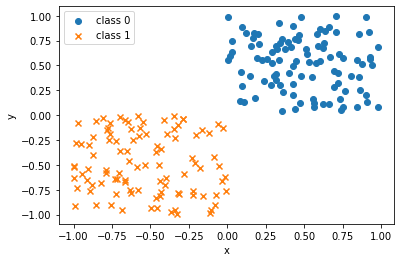

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
# X軸Y軸ともに0から1までの一様分布から100点をサンプリング
X0 = np.random.uniform(size=(100,2))
# クラス0のラベルを100個生成
y0 = np.repeat(0,100)
# X軸Y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = np.random.uniform(-1.0, 0.0, size=(100,2))
# クラス1のラベルを100個生成
y1 = np.repeat(1, 100)
# 散布図をプロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1], marker="o", label="class 0")
ax.scatter(X1[:, 0], X1[:, 1], marker="x", label="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [25]:
from sklearn.svm import SVC
# 学習, および決定境界, マージン, サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1, ymax=1):
  #サポートベクタマシンのインスタンス化
  svc = SVC(kernel=kernel, C=C)
  # 学習
  svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))

  fig, ax = plt.subplots()
  ax.scatter(X0[:, 0], X0[:, 1], marker="o", label="class 0")
  ax.scatter(X1[:, 0], X1[:, 1], marker="x", label="class 1")
  # 決定境界とマージンをプロット
  xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
  p = np.vstack([xx.ravel(), yy.ravel()]).T
  ax.contour(xx, yy, p, color="k", levels=[-1, 0, 1], alpha=0.5, linestyle=["--", "-", "--"])
  #サポートベクタをプロット
  ax.scatter(svc.support_vectors_[:, 0],
             svc.support_vectors_[:, 1],
             s=250, facecolors="none",
             edgecolors="black")
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.legend(loc="best")
  plt.show()

TypeError: ignored

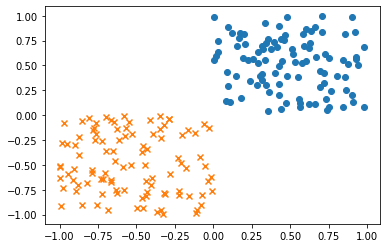

In [27]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel="linear", C=1e6)